In [1]:
from db.database import Database
from sklearn.cluster import KMeans
import numpy as np

In [2]:
db = Database()
topics = {topic.topic_id: topic for topic in db.get_topics()}
posts = {post.post_id: post for post in db.get_posts()}
blueprints = {bp.id: bp for bp in db.get_all_blueprints()}

Loading blueprints: 100%|██████████| 2228/2228 [00:01<00:00, 1349.50it/s]


In [3]:
import tqdm
from util.lang_identification import identify_language_yaml

non_english = {} 
for bp in tqdm.tqdm(blueprints.values(), desc="Detecting languages"):
    lang = identify_language_yaml(bp.blueprint_code)
    if lang != "en":
        non_english[bp] = lang
        
for bp in non_english:
    blueprints.pop(bp.id)
blueprints.__len__()

groups = db.get_blueprints_per_topic()

english_ids = set(blueprints.keys())   
filtered_groups = {
    topic_id: [bp for bp in bps if bp.id in english_ids]
    for topic_id, bps in groups.items()
}
filtered_groups.keys().__len__()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Detecting languages: 100%|██████████| 2228/2228 [00:40<00:00, 54.57it/s]


1211

In [5]:
from util.structural_diff import compare_multiple_bps, structural_diff
tbr = []
limit = 0.8
for topic_id, bps in tqdm.tqdm(filtered_groups.items(), desc="Comparing Blueprints"):
    if bps.__len__() == 2:
        _, score = structural_diff(bps[0].blueprint_code, bps[1].blueprint_code)
        if score > limit:
            tbr.append(bps[0])
    if bps.__len__() >= 2:
        scores = compare_multiple_bps(bps)
        sim_groups = []
        
        for bp1, bp2, score in scores:
            if score > limit:
                sim_groups.append((bp1, bp2))
                
        if sim_groups.__len__() > 0:
            flat_sim_groups = set(bp for pair in sim_groups for bp in pair)
            for bp in flat_sim_groups:
                if bp != list(flat_sim_groups)[-1]:
                    tbr.append(bp)

tbr.__len__()

Comparing Blueprints: 100%|██████████| 1211/1211 [02:16<00:00,  8.86it/s]


405

In [6]:
for bp in tbr:
    blueprints.pop(bp.id)
blueprints.__len__()

1786

In [7]:
import pandas as pd
bp_df = pd.DataFrame([{_attr: getattr(bp, _attr) for _attr in bp.__dict__.keys()
                        } for bp in blueprints.values()])
bp_df.head()

,_sa_instance_state,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,id,blueprint_hash,name,extracted_keywords,keywords_yake,post,topic_title,topic_id,tags,created_at,post_content
0,<sqlalchemy.orm.state.InstanceState object at ...,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{'android': 0.04282333988128355, 'user': 0.042...","{'nag': 0.6591492709484212, 'prompt': 0.237436...",1,2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,Nag prompt blueprint,{'input__input_boolean': 2},"{'android': 0.04282333988128355, 'user': 0.042...",<db.models.Post object at 0x000001F7FE25A6C0>,Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...
1,<sqlalchemy.orm.state.InstanceState object at ...,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{'inovelli': 0.027025502281732554, 'create': 0...","{'inovelli': 0.49285018857218027, 'lzw36': 0.4...",2,ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,Inovelli,{},"{'inovelli': 0.027025502281732554, 'create': 0...",<db.models.Post object at 0x000001F7FE25B7D0>,Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...
2,<sqlalchemy.orm.state.InstanceState object at ...,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{'short': 0.01649244354775234, 'long': 0.01649...","{'button': 0.4699242472830788, 'five': 0.35503...",3,c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,deCONZ - IKEA five button remote,{'input__deconz': 1},"{'short': 0.01649244354775234, 'long': 0.01649...",<db.models.Post object at 0x000001F7FE25BAD0>,deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community..."
3,<sqlalchemy.orm.state.InstanceState object at ...,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{'set': 0.055741499059047184, 'temperature': 0...","{'heat': 0.34881772060990424, 'heating': 0.334...",4,00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,Heat for certain time,"{'input__input_datetime': 1, 'input__climate': 2}","{'set': 0.055741499059047184, 'temperature': 0...",<db.models.Post object at 0x000001F7FE25BDD0>,Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the..."
4,<sqlalchemy.orm.state.InstanceState object at ...,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{'time': 0.11369206228658875, 'light': 0.13453...","{'allotted': 0.6327468890387052, 'allowance': ...",5,0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,Light Allowance,"{'input__light': 1, 'output__light': 1}","{'time': 0.11369206228658875, 'light': 0.13453...",<db.models.Post object at 0x000001F7FE2681A0>,Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...


In [8]:
bp_df = bp_df.drop(columns=["_sa_instance_state"])
bp_df.head()

,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,id,blueprint_hash,name,extracted_keywords,keywords_yake,post,topic_title,topic_id,tags,created_at,post_content
0,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{'android': 0.04282333988128355, 'user': 0.042...","{'nag': 0.6591492709484212, 'prompt': 0.237436...",1,2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,Nag prompt blueprint,{'input__input_boolean': 2},"{'android': 0.04282333988128355, 'user': 0.042...",<db.models.Post object at 0x000001F7FE25A6C0>,Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...
1,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{'inovelli': 0.027025502281732554, 'create': 0...","{'inovelli': 0.49285018857218027, 'lzw36': 0.4...",2,ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,Inovelli,{},"{'inovelli': 0.027025502281732554, 'create': 0...",<db.models.Post object at 0x000001F7FE25B7D0>,Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...
2,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{'short': 0.01649244354775234, 'long': 0.01649...","{'button': 0.4699242472830788, 'five': 0.35503...",3,c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,deCONZ - IKEA five button remote,{'input__deconz': 1},"{'short': 0.01649244354775234, 'long': 0.01649...",<db.models.Post object at 0x000001F7FE25BAD0>,deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community..."
3,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{'set': 0.055741499059047184, 'temperature': 0...","{'heat': 0.34881772060990424, 'heating': 0.334...",4,00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,Heat for certain time,"{'input__input_datetime': 1, 'input__climate': 2}","{'set': 0.055741499059047184, 'temperature': 0...",<db.models.Post object at 0x000001F7FE25BDD0>,Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the..."
4,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{'time': 0.11369206228658875, 'light': 0.13453...","{'allotted': 0.6327468890387052, 'allowance': ...",5,0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,Light Allowance,"{'input__light': 1, 'output__light': 1}","{'time': 0.11369206228658875, 'light': 0.13453...",<db.models.Post object at 0x000001F7FE2681A0>,Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...


In [11]:
bp_df = bp_df.drop(columns=["post"])
bp_df.head()

,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,id,blueprint_hash,name,extracted_keywords,keywords_yake,topic_title,topic_id,tags,created_at,post_content
0,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{""android"": 0.04282333988128355, ""user"": 0.042...","{""nag"": 0.6591492709484212, ""prompt"": 0.237436...",1,2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,Nag prompt blueprint,"{""input__input_boolean"": 2}","{""android"": 0.04282333988128355, ""user"": 0.042...",Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...
1,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.027025502281732554, ""create"": 0...","{""inovelli"": 0.49285018857218027, ""lzw36"": 0.4...",2,ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,Inovelli,{},"{""inovelli"": 0.027025502281732554, ""create"": 0...",Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...
2,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{""short"": 0.01649244354775234, ""long"": 0.01649...","{""button"": 0.4699242472830788, ""five"": 0.35503...",3,c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","{""short"": 0.01649244354775234, ""long"": 0.01649...",deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community..."
3,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{""set"": 0.055741499059047184, ""temperature"": 0...","{""heat"": 0.34881772060990424, ""heating"": 0.334...",4,00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","{""set"": 0.055741499059047184, ""temperature"": 0...",Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the..."
4,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{""time"": 0.11369206228658875, ""light"": 0.13453...","{""allotted"": 0.6327468890387052, ""allowance"": ...",5,0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","{""time"": 0.11369206228658875, ""light"": 0.13453...",Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...


In [ ]:
import json
bp_df["keywords_tfidf"] = bp_df["keywords_tfidf"].apply(lambda x: json.dumps(x) if x is not None else None)
bp_df["keywords_yake"] = bp_df["keywords_yake"].apply(lambda x: json.dumps(x) if x is not None else None)
bp_df["extracted_keywords"] = bp_df["extracted_keywords"].apply(lambda x: json.dumps(x) if x is not None else None)
bp_df["topic_keywords"] = bp_df["topic_keywords"].apply(lambda x: json.dumps(x) if x is not None else None)
bp_df.head()

,blueprint_url,blueprint_code,post_id,description,topic_keywords,keywords_tfidf,id,blueprint_hash,name,extracted_keywords,keywords_yake,post,topic_title,topic_id,tags,created_at,post_content
0,https://community.home-assistant.io//t/nag-pro...,blueprint:\n name: Nag prompt blueprint\n de...,1220860,Nag a mobile device to do something,"{""android"": 0.04282333988128355, ""user"": 0.042...","{""nag"": 0.6591492709484212, ""prompt"": 0.237436...",1,2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,Nag prompt blueprint,"{""input__input_boolean"": 2}","{""android"": 0.04282333988128355, ""user"": 0.042...",<db.models.Post object at 0x000001F7FE25A6C0>,Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...
1,https://community.home-assistant.io//t/inovell...,blueprint:\n name: Inovelli \n description: ...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.027025502281732554, ""create"": 0...","{""inovelli"": 0.49285018857218027, ""lzw36"": 0.4...",2,ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,Inovelli,{},"{""inovelli"": 0.027025502281732554, ""create"": 0...",<db.models.Post object at 0x000001F7FE25B7D0>,Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...
2,https://community.home-assistant.io//t/deconz-...,blueprint:\n name: deCONZ - IKEA five button ...,1223455,Control anything using IKEA five button remote\n,"{""short"": 0.01649244354775234, ""long"": 0.01649...","{""button"": 0.4699242472830788, ""five"": 0.35503...",3,c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","{""short"": 0.01649244354775234, ""long"": 0.01649...",<db.models.Post object at 0x000001F7FE25BAD0>,deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community..."
3,https://community.home-assistant.io//t/set-hea...,blueprint:\n name: Heat for certain time\n d...,1223628,Turn on heating for a given amount of time.,"{""set"": 0.055741499059047184, ""temperature"": 0...","{""heat"": 0.34881772060990424, ""heating"": 0.334...",4,00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","{""set"": 0.055741499059047184, ""temperature"": 0...",<db.models.Post object at 0x000001F7FE25BDD0>,Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the..."
4,https://community.home-assistant.io//t/light-a...,blueprint:\n name: Light Allowance\n descrip...,1224871,Turns a light off after an allotted time,"{""time"": 0.11369206228658875, ""light"": 0.13453...","{""allotted"": 0.6327468890387052, ""allowance"": ...",5,0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","{""time"": 0.11369206228658875, ""light"": 0.13453...",<db.models.Post object at 0x000001F7FE2681A0>,Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...


In [ ]:
bp_df.to_sql("blueprints_filtered", db.engine.connect(), if_exists="replace", index=False)

1786

: 

### kmeans test

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ensure consistent feature lengths
def extract_features(row, tfidf_size=2, yake_size=2):
    # Extract TF-IDF features and pad/truncate to fixed size
    tfidf_features = list(row["keywords_tfidf"].values())
    tfidf_features = tfidf_features[:tfidf_size] + [0] * (tfidf_size - len(tfidf_features))
    
    # Extract YAKE features and pad/truncate to fixed size
    yake_features = list(row["keywords_yake"].values())
    yake_features = yake_features[:yake_size] + [0] * (yake_size - len(yake_features))
    
    # Combine TF-IDF and YAKE features
    combined_features = tfidf_features + yake_features
    return combined_features

# Apply the updated function
bp_df["features"] = bp_df.apply(extract_features, axis=1)

# Create a feature matrix
X = np.vstack(bp_df["features"].values)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(random_state=42)
bp_df["cluster"] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(bp_df[["id", "cluster"]].head())

   id  cluster
0   1        5
1   2        2
2   3        0
3   4        1
4   5        3


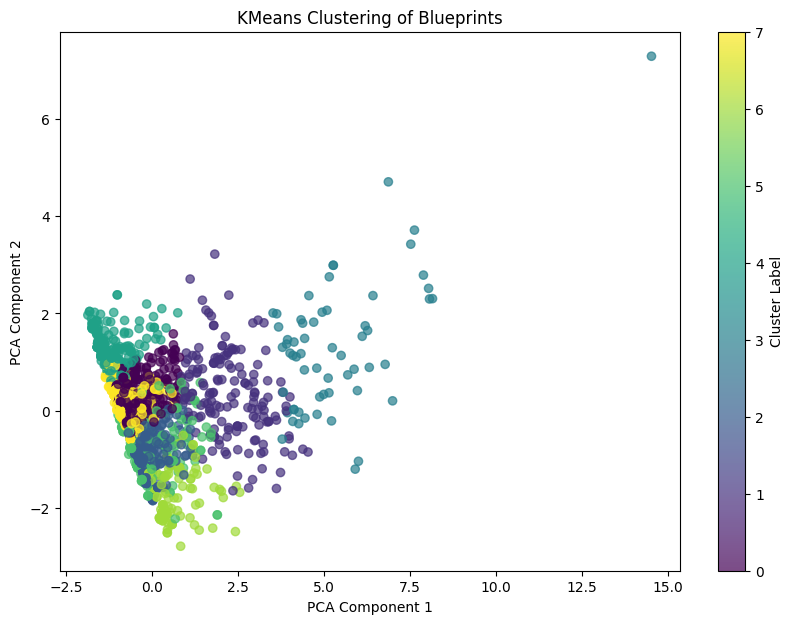

In [ ]:
def visualize_clusters(X, labels):
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title("KMeans Clustering of Blueprints")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label="Cluster Label")
    plt.show()

visualize_clusters(X_scaled, bp_df["cluster"])  

In [12]:
cluster_1 = bp_df[bp_df["cluster"] == 3]
cluster_1.head()

,_sa_instance_state,blueprint_code,blueprint_url,post_id,description,topic_keywords,keywords_tfidf,blueprint_hash,id,name,extracted_keywords,keywords_yake,post,topic_title,topic_id,tags,created_at,post_content,features,cluster
4,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Light Allowance\n descrip...,https://community.home-assistant.io//t/light-a...,1224871,Turns a light off after an allotted time,"{'allotted': 0.6330710810698282, 'allowance': ...","{'allotted': 0.6330710810698282, 'allowance': ...",0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,5,Light Allowance,"{'input__light': 1, 'output__light': 1}","{'time': 0.11369206228658875, 'light': 0.13453...",<db.models.Post object at 0x000001F32CD0BBD0>,Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...,"[0.6330710810698282, 0.615288026166565, 0.1136...",3
6,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Set thermostat temperature...,https://community.home-assistant.io//t/simple-...,1223792,Sets a Thermostat to a specifc temperature at ...,"{'thermostat': 0.6335417944164303, 'temperatur...","{'thermostat': 0.6335417944164303, 'temperatur...",b5112b5ee29a5b490495568c04f2d1defe4fcece7b21cc...,7,Set thermostat temperature at specific time,{'output__climate': 1},"{'nice': 0.1227580385369264, 'simple': 0.14742...",<db.models.Post object at 0x000001F32CD34890>,Simple - Set Thermostat at specific time,255778,[],2020-12-15 15:50:31.943,<p>Simple to use Blueprint that sets your Ther...,"[0.6335417944164303, 0.33825734748397857, 0.12...",3
17,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Motion audio clip announce...,https://community.home-assistant.io//t/motion-...,1226316,,"{'clip': 0.6054941117886238, 'audio': 0.500775...","{'clip': 0.6054941117886238, 'audio': 0.500775...",8704d1880caab4cedd7967f3a4aa0ba944239fb6f2defb...,20,Motion audio clip announcer,"{'input__binary_sensor': 2, 'input__motion': 2...","{'audio': 0.11185087393202754, 'clip': 0.11185...",<db.models.Post object at 0x000001F32CEDAC90>,Motion audio clip announcer,256430,"[""automation"", ""media_player"", ""blueprint""]",2020-12-16 21:59:31.401,<p>This plays an audio clip whenever a sensor ...,"[0.6054941117886238, 0.5007753603522973, 0.111...",3
29,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Zone leaving Notification\...,https://community.home-assistant.io//t/enter-z...,1258462,Send a notification to a device when a person ...,"{'zone': 0.8035180898019291, 'notification': 0...","{'zone': 0.8035180898019291, 'notification': 0...",c2c28a888c2be8b32297dc6226d6e80d7e0716d12e6e3a...,33,Zone leaving Notification,"{'input__person': 1, 'output__mobile_app': 2}","{'enter': 0.11718348279991213, 'zone': 0.13945...",<db.models.Post object at 0x000001F32D01FB10>,Enter zone,264857,[],2021-01-06 11:06:30.059,"<p>leave zone:</p>\n<pre><code class=""lang-aut...","[0.8035180898019291, 0.26703497369638884, 0.11...",3
30,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Send actionable notificati...,https://community.home-assistant.io//t/actiona...,1259774,Send actionable notifications to an Android de...,"{'application': 0.38128424425827523, 'actionab...","{'application': 0.38128424425827523, 'actionab...",500e677ddb6ceea6705fbc94d50f375485c4b8756a4db4...,34,Send actionable notifications for Android,"{'input__binary_sensor': 1, 'output__binary_se...","{'actionable': 0.15831692877998726, 'sensors':...",<db.models.Post object at 0x000001F32CF89CD0>,Actionable Notifications with binary Sensors,265149,[],2021-01-06 23:48:28.592,"<pre><code class=""lang-auto"">blueprint:\n nam...","[0.38128424425827523, 0.2923983342681513, 0.15...",3


### embeddings

In [ ]:
import re
def process_bp_keywords(kwd_dict: dict[str, int]) -> str | None:
    kwd_list = list(kwd_dict.keys())
    if kwd_list.__len__() < 1:
        return ""
    
    concat_kwds = ""
    
    for kwd in kwd_list:
        in_out = re.search(r"(input__|output__)", kwd)
        kwd = kwd.removeprefix(in_out.group()) if in_out else kwd
        concat_kwds += f"{in_out.group().replace('__', '')}: {kwd}; "
    return concat_kwds

In [81]:
sents = []
for row in bp_df.itertuples():
    kwds = process_bp_keywords(row.extracted_keywords)
        
    sent = f"{kwds}tfidf: {list(row.keywords_tfidf.keys())}; yake: {list(row.keywords_yake.keys())}"
    
    sents.append(sent)
bp_df["sents"] = sents
bp_df.head()

,_sa_instance_state,blueprint_code,blueprint_url,post_id,description,topic_keywords,keywords_tfidf,blueprint_hash,id,name,extracted_keywords,keywords_yake,post,topic_title,topic_id,tags,created_at,post_content,sents
0,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Nag prompt blueprint\n de...,https://community.home-assistant.io//t/nag-pro...,1220860,Nag a mobile device to do something,"{'nag': 0.66021433671546, 'prompt': 0.23634566...","{'nag': 0.66021433671546, 'prompt': 0.23634566...",2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,1,Nag prompt blueprint,{'input__input_boolean': 2},"{'android': 0.04282333988128355, 'user': 0.042...",<db.models.Post object at 0x000001F32C50EA90>,Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...,"input: input_boolean; tfidf: ['nag', 'prompt']..."
1,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Inovelli \n description: ...,https://community.home-assistant.io//t/inovell...,1220678,Use this blueprint to create automations based...,"{'inovelli': 0.49695533075954657, 'lzw36': 0.4...","{'inovelli': 0.49695533075954657, 'lzw36': 0.4...",ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,2,Inovelli,{},"{'inovelli': 0.027025502281732554, 'create': 0...",<db.models.Post object at 0x000001F32CCCDF50>,Inovelli LZW36 Fan/Dimmer Scenes,254999,"[""blueprint""]",2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...,"tfidf: ['inovelli', 'lzw36']; yake: ['inovelli..."
2,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: deCONZ - IKEA five button ...,https://community.home-assistant.io//t/deconz-...,1223455,Control anything using IKEA five button remote\n,"{'button': 0.47028047688169866, 'five': 0.3549...","{'button': 0.47028047688169866, 'five': 0.3549...",c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,3,deCONZ - IKEA five button remote,{'input__deconz': 1},"{'short': 0.01649244354775234, 'long': 0.01649...",<db.models.Post object at 0x000001F32CCDE910>,deCONZ - IKEA five button remote,255699,"[""switch"", ""blueprint"", ""deconz""]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community...","input: deconz; tfidf: ['button', 'five']; yake..."
3,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Heat for certain time\n d...,https://community.home-assistant.io//t/set-hea...,1223628,Turn on heating for a given amount of time.,"{'heat': 0.3484675281776271, 'heating': 0.3360...","{'heat': 0.3484675281776271, 'heating': 0.3360...",00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,4,Heat for certain time,"{'input__input_datetime': 1, 'input__climate': 2}","{'set': 0.055741499059047184, 'temperature': 0...",<db.models.Post object at 0x000001F32CCFAD90>,Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the...",input: input_datetime; input: climate; tfidf: ...
4,<sqlalchemy.orm.state.InstanceState object at ...,blueprint:\n name: Light Allowance\n descrip...,https://community.home-assistant.io//t/light-a...,1224871,Turns a light off after an allotted time,"{'allotted': 0.6330710810698282, 'allowance': ...","{'allotted': 0.6330710810698282, 'allowance': ...",0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,5,Light Allowance,"{'input__light': 1, 'output__light': 1}","{'time': 0.11369206228658875, 'light': 0.13453...",<db.models.Post object at 0x000001F32CD0BBD0>,Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...,input: light; output: light; tfidf: ['allotted...


In [ ]:
import sentence_transformers
model = sentence_transformers.SentenceTransformer("all-MiniLM-L6-v2")
embeddings = []
for row in tqdm.tqdm(bp_df.itertuples(), total=bp_df.shape[0], desc="Embedding sentences"):
    embedding = model.encode(row.sents)
    embeddings.append(embedding)
bp_df["embeddings"] = embeddings

Embedding sentences: 100%|██████████| 1779/1779 [00:28<00:00, 61.72it/s]


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
embedding_matrix = np.vstack(bp_df["embeddings"].values)
sil_score = silhouette_score(embedding_matrix, bp_df["cluster"])